<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/2025/Caso_05_Medidas_de_dispersi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medidas de dispersión

## Objetivo

Determinar medidas de dispersión de valores numéricos de características de personas.


## Fundamento teórico

### Fórmula de la varianza y desviación estándar

La varianza es una medida de variabilidad de los datos y la desviación estándar es la raiz cuadrada de la varianza y representa que tanto están alejados los valores numéricos con respecto a la media aritmética.

### Población:

Se presentan las fórmulas para calcular varianza y desviación estándar de una población.

#### Varianza $\sigma^2$;

$$
\sigma^2 = \frac{\sum_{i=1}^N(x_i- \mu)^2}{N}
$$

#### Desviación Estándar $\sigma$.

La desviación estándar es la raiz cuadrada de la varianza y representa la variabilida de los datos en las mismas unidades que la media.

$$
\sigma = \sqrt{\frac{\sum_{i=1}^n(x_i- \mu)^2}{N}}=\sqrt{\sigma^2}
$$


### Muestra:
Se presentan las fórmulas para calcular varianza y desviación estándar de una muestra.

#### Varianza $\sigma^2$;

$$
\sigma^2 = \frac{\sum_{i=1}^N(x_i- \bar{x})^2}{n-1}
$$

#### Desviación Estándar $\sigma$.

La desviación estándar es la raiz cuadrada de la varianza y representa la variabilidad de los datos en las mismas unidades que la media.

$$
\sigma = \sqrt{\frac{\sum_{i=1}^n(x_i- \bar{x})^2}{n-1}}=\sqrt{\sigma^2}
$$


### Coeficiente de variación

Mide de dos o mas conjuntos de datos cual tiene mayor variación entre si.

$$
CV = \frac{\sigma}{\bar{x}}
$$

## Desarrollo

### Cargar librerías


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Crear funciones


In [ ]:
def f_crear_datos():
  # Los datos significan edades de personas.
  # Los datos son estaturas de personas en centímetros
  estaturas = [165, 175, 169, 180, 178, 170, 168, 160, 172, 153,
               166, 175, 180, 169, 180, 170, 172, 170, 170, 170] # lista de estaturas
  pesos =  [65, 76, 72, 82, 83, 69, 68, 59, 78, 60,
            70, 80, 82, 70, 75, 78, 76, 74, 75, 72]
  edades = [22, 24, 25, 26, 18, 22, 24, 25, 28, 29,
            18, 29, 20, 22, 24, 26, 25, 24, 29, 24]

  # print(estaturas)

  # n = len(estaturas)
  # print("Número de observaciones o estaturas de personas: ", n)
  datos = pd.DataFrame({'estaturas' : estaturas, 'pesos':pesos,
                        'edades':edades})
  return datos

# Visualiza dispersión de los valores numéricos uno a uno con respecto a la media
def f_visualizar_dispersion(numeros, contexto):
  # Calcular la media de los vlores numéricos
  media = np.mean(numeros)

  CV = round(np.std(numeros, ddof=1) / media, 2 )

  # Crear la visualización de manera horizontal
  plt.figure(figsize=(10, 6))

  # Números del 1 al 20 para el eje X
  numeros_x = np.arange(1, len(numeros) + 1)

  plt.scatter(numeros_x, numeros, label=contexto+';'f'CV:{CV:.2f}')
  plt.axhline(y=media, color='r', linestyle='--', label=f'Media: {media:.2f}')

  # Añadir título y etiquetas
  plt.title('Dispersión ' + contexto)
  plt.xlabel('Número de observación')
  plt.ylabel(contexto)
  plt.legend()

  # Mostrar el gráfico
  plt.show()


# Función que visualzia histogrma de una variable de interés numérica
def f_visualizar_histograma(numeros, contexto):
  # Crear un histograma
  # Crear un histograma
  media = np.mean(numeros)
  desviacion_estandar = np.std(numeros, ddof=1)
  plt.hist(numeros, bins=8, edgecolor='k', alpha=0.7)
  plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media = {media:.2f}')
  plt.axvline(media - desviacion_estandar, color='orange', linestyle='dashed', linewidth=2, label=f'Desv. Estándar = {desviacion_estandar:.2f}')
  plt.axvline(media + desviacion_estandar, color='orange', linestyle='dashed', linewidth=2)
  plt.title('Histograma de ' + contexto + ' con media y desviación estándar')
  plt.xlabel(contexto)
  plt.ylabel('Frecuencia')
  plt.legend()
  plt.show()

### Calcular varianza y desviación estándar de una muestra

Ejemplo de cálculo de la varianza y desviación estándar de una muestra manualmente.



In [ ]:
estaturas = [165, 175, 169, 180, 178, 170, 168, 160, 172, 153,
               166, 175, 180, 169, 180, 170, 172, 170, 170, 170] # lista de estaturas
n = len(estaturas)
media = np.mean(estaturas)
# Generar columnas siguientes
tabla = pd.DataFrame({'x': estaturas})
tabla['x_me'] = media
tabla['x-x_me'] = tabla['x']- tabla['x_me']
tabla['(x-x_me)^2'] = tabla['x-x_me']**2  # Al cuadraddo


print(tabla)

sumatoria = sum(tabla['(x-x_me)^2'])


varianza = sumatoria / (n-1)
desv_std = np.sqrt(varianza)

# El argumento ddof=True significa que la desv. std es sobre una muestra es decir sobre n-1
# de acuerdo a la fórmula

print("La varianza ", varianza, "Con np.var(): ", np.var(estaturas, ddof=True))
print("La desviación estándar: ", desv_std, "Con np.std()", np.std(estaturas, ddof=True))

      x   x_me  x-x_me  (x-x_me)^2
0   165  170.6    -5.6       31.36
1   175  170.6     4.4       19.36
2   169  170.6    -1.6        2.56
3   180  170.6     9.4       88.36
4   178  170.6     7.4       54.76
5   170  170.6    -0.6        0.36
6   168  170.6    -2.6        6.76
7   160  170.6   -10.6      112.36
8   172  170.6     1.4        1.96
9   153  170.6   -17.6      309.76
10  166  170.6    -4.6       21.16
11  175  170.6     4.4       19.36
12  180  170.6     9.4       88.36
13  169  170.6    -1.6        2.56
14  180  170.6     9.4       88.36
15  170  170.6    -0.6        0.36
16  172  170.6     1.4        1.96
17  170  170.6    -0.6        0.36
18  170  170.6    -0.6        0.36
19  170  170.6    -0.6        0.36
La varianza  44.778947368421065 Con np.var():  44.778947368421065
La desviación estándar:  6.6917073582473 Con np.std() 6.6917073582473


### Crear los datos

Se crea un conjunto datos con variables estaturas, pesos y edades.


In [ ]:
datos = f_crear_datos()
print ("Se crearon los datos")
n = len(datos)
print ("Tamaño de la muestra", n)
print (datos)

Se crearon los datos
Tamaño de la muestra 20
    estaturas  pesos  edades
0         165     65      22
1         175     76      24
2         169     72      25
3         180     82      26
4         178     83      18
5         170     69      22
6         168     68      24
7         160     59      25
8         172     78      28
9         153     60      29
10        166     70      18
11        175     80      29
12        180     82      20
13        169     70      22
14        180     75      24
15        170     78      26
16        172     76      25
17        170     74      24
18        170     75      29
19        170     72      24


### Estadísticos decriptivos

Con la función *describe()* se obervan los estadísticos de las variables numéricas.


In [ ]:

datos.describe()


,estaturas,pesos,edades
count,20.000000,20.000000,20.000000
mean,170.600000,73.200000,24.200000
std,6.691707,6.794735,3.254147
min,153.000000,59.000000,18.000000
25%,168.750000,69.750000,22.000000
50%,170.000000,74.500000,24.000000
75%,175.000000,78.000000,26.000000
max,180.000000,83.000000,29.000000


### Visualizar los estadísticos

Se visualiza el histograma de los datos numéricos con una línea de la media y relación con la desviación estándar.

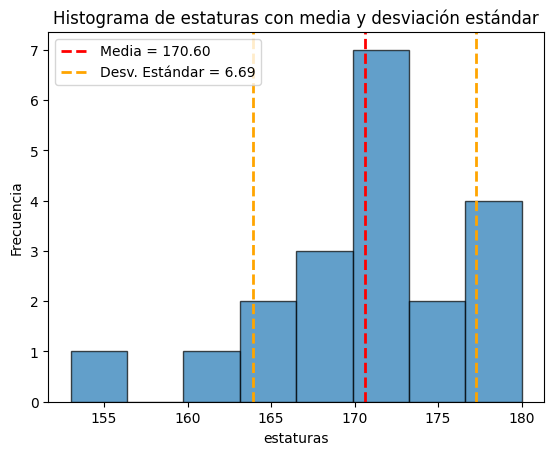

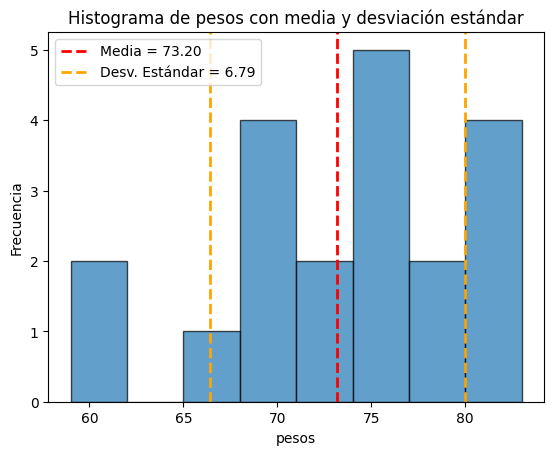

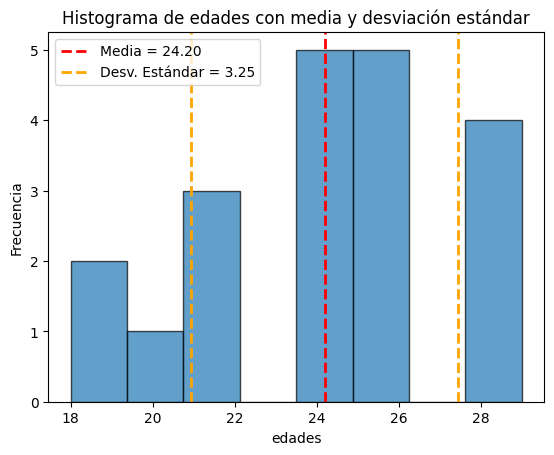

In [ ]:
f_visualizar_histograma(datos['estaturas'], 'estaturas')
f_visualizar_histograma(datos['pesos'], 'pesos')
f_visualizar_histograma(datos['edades'], 'edades')


La media de los datos en la línea de color rojo representa el promedio de los valores numéricos ya sea estatuas, pesos o edades.

La línea en color amarillo representa la desviación estándar o la variabilidad de los datos, es decir que tanto varían en promedio hacia abajo (iquierda) de la media o por encima (derecha) de la media.

### Coeficiente de variación

Se determina el coeficiente de variación $CV$ para determinar cual conjunto de datos es más variable.

$$
CV = \frac{\sigma}{\bar{x}}
$$

Se tienen dos conjuntos de datos del mismo tipo, por ejemplo, dos conjuntos de datos de estaturas de diferentes grupo de personas.

* Grupo A = {[165, 175, 169, 180, 178, 170, 168, 160, 172, 153, 166, 175, 180, 169, 180, 170, 172, 170, 170, 170]}
* Grupo B

La pregunta es ¿De los dos grupos cuál de los datos tiene mayor variación?, hay que determinar el coeficient de vaarición $CV$



In [ ]:
grupo_A = [165, 175, 169, 180, 178, 170, 168, 160, 172, 153,
     166, 175, 180, 169, 180, 170, 172, 170, 170, 170]

grupo_B = [170, 190, 150, 180, 150, 180, 170, 175, 160, 160,
     165, 170, 150, 160, 180, 190, 145, 165, 165, 170]


# ddof=1 significa ddof=True que se trata de una muestra
CV_A = (np.std(grupo_A, ddof=1) / np.mean(grupo_A))
CV_B = (np.std(grupo_B, ddof=1) / np.mean(grupo_B))

print ("El CV del grupo A es:", round(CV_A, 2))
print ("El CV del grupo B es:", round(CV_B, 2))

if CV_A > CV_B:
  print ("La variación del grupo A es mayor que la variación del grupo B")
else:
  print ("La variación del grupo B es mayor que la variación del grupo A")


El CV del grupo A es: 0.04
El CV del grupo B es: 0.08
La variación del grupo B es mayor que la variación del grupo A


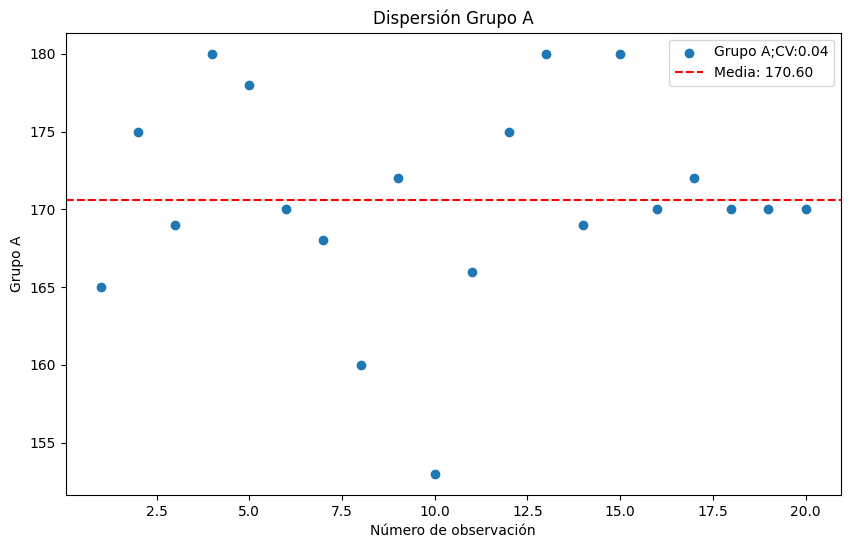

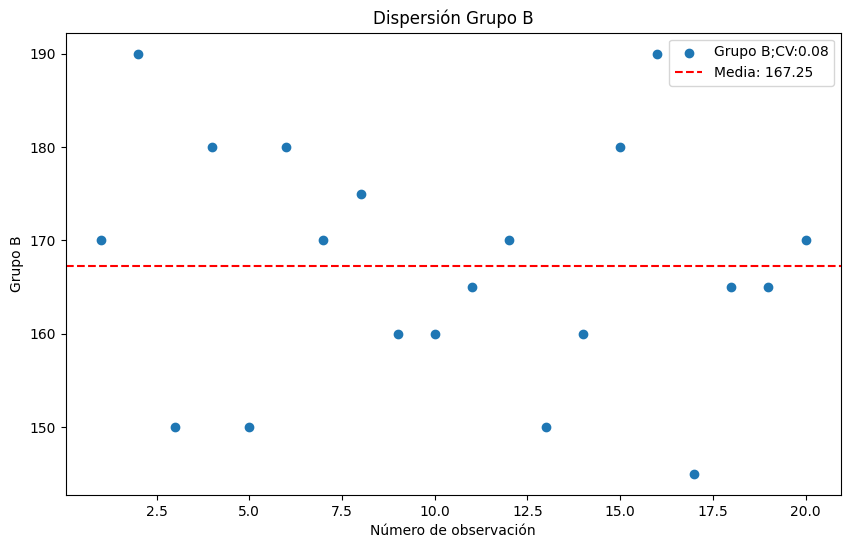

In [ ]:
# Visualizar dispersión de los valores del grupo A y B
f_visualizar_dispersion(grupo_A, 'Grupo A')
f_visualizar_dispersion(grupo_B, 'Grupo B')

## Interpretación

Se utilizaron unos datos que representan la estaturas en centímetros, los pesos coporales en kgs. y las edades de personas

El valor de $n$ es de 20 observaciones o 20 datos.

La media aritmética de estaturas fue de aproximadamente 170.04 y la desviaicón estándar fue de 6.69.

La media aritmética de estaturas fue de 73.20 con deviación etádnar de 6.79.

La media aritmética de edades fue de 24.2 con desviación estándar de 3.25

La desvición estándar significa que tanto varían los datos con respecto a la media aritmética

Se visualizó un histograma de cada una de las variables numéricas que representa la distribución de los datos identificando la media airtimética en color rojo y  la desviación etánra en color amarillo.

Con respecto a comparar la variación entre dos conjuntos de datos, los datos del grupo B están más dispersos o son más variables que los valores del grupo A, el valo de CV del grupo A es menor que el CV de los valores del grupo B.